<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/8_3_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8.3. Методы опорных векторов (SVM)
### Введение

Методы опорных векторов (SVM, Support Vector Machines) представляют собой мощный инструмент для классификации и регрессии. В контексте обработки естественного языка (NLP) SVM часто используются для задач, таких как классификация текстов, анализ тональности, определение тематики и многие другие. В данной лекции мы подробно рассмотрим принципы работы SVM, математические основы, градиенты и примеры применения в задачах NLP.

### 1. Основы SVM

#### 1.1. Определение задачи

SVM предназначены для классификации данных, когда мы имеем дело с двумя классами (двухклассовая классификация). Данные представляются в виде точек в многомерном пространстве, и цель SVM заключается в нахождении гиперплоскости, которая максимально разделяет эти классы.

#### 1.2. Гиперплоскость

Гиперплоскость в $ n$-мерном пространстве задается уравнением:

$$
w \cdot x + b = 0
$$

где:
- $ w$ — вектор весов (нормаль к гиперплоскости),
- $ x$ — вектор признаков (вектор входных данных),
- $ b$ — смещение.

#### 1.3. Опорные векторы

Опорные векторы — это точки, которые находятся ближе всего к гиперплоскости и определяют её положение. Эти точки критически важны для построения модели, так как они влияют на её характеристики.

### 2. Оптимизация и критерий максимизации

#### 2.1. Функция потерь

Для правильной классификации мы хотим минимизировать ошибку. Используем мягкий маржин для того, чтобы иметь возможность допускать некоторые ошибки. В этом случае, если данные разделимы, мы можем формализовать задачу как:

$$
\min_{w,b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} \xi_i
$$

где:
- $ m$ — количество обучающих примеров,
- $ C$ — параметр, регулирующий важность правильной классификации и ширины маржи,
- $ \xi_i$ — величина ошибки для примера $ i$.

#### 2.2. Ограничения

Задача также включает ограничения для корректной классификации:

$$
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad i = 1, \ldots, m
$$

где $ y_i$ — метка класса ($ +1$ или $ -1$) для примера $ i$.

### 3. Лагранжево преобразование

Чтобы решить эту задачу, применяем метод Лагранжа. Мы формируем функцию Лагранжа:

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} \xi_i - \sum_{i=1}^{m} \alpha_i (y_i (w \cdot x_i + b) - 1 + \xi_i)
$$

где $ \alpha_i$ — множители Лагранжа.

### 4. Оптимизация

#### 4.1. Условия Куна-Таккера

Для нахождения экстремума мы берем производные по $ w$, $ b$ и $ \alpha$:

$$
\frac{\partial L}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^{m} \alpha_i y_i x_i
$$

$$
\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^{m} \alpha_i y_i = 0
$$

$$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i = 0 \Rightarrow \alpha_i = C \quad \text{для } \xi_i > 0
$$

#### 4.2. Двойственная задача

Мы можем записать двойственную задачу:

$$
\max_{\alpha} \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)
$$

при ограничениях:

$$
\sum_{i=1}^{m} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

### 5. Ядровые функции

Для обработки нелинейных данных SVM использует ядровые функции, которые позволяют трансформировать данные в более высокое измерение без явного вычисления координат в этом пространстве.

#### 5.1. Примеры ядер

- Линейное ядро:
  $$
  K(x_i, x_j) = x_i \cdot x_j
  $$

- Полиномиальное ядро:
  $$
  K(x_i, x_j) = (x_i \cdot x_j + c)^d
  $$

- Гауссово (радиальное базисное) ядро:
  $$
  K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
  $$

### 6. Применение SVM в NLP

#### 6.1. Классификация текстов

В задачах NLP SVM часто используется для классификации текстов. Например, можно использовать SVM для определения тональности текстов (позитивная, негативная).

#### Пример

1. Подготовка данных: Тексты преобразуются в векторы признаков, используя методы, такие как TF-IDF или Word2Vec.

2. Обучение модели: Обучаем SVM на подготовленных данных с метками классов (например, позитивный/негативный).

3. Оценка производительности: Используем метрики, такие как точность, полнота и F-мера для оценки качества модели.

#### 6.2. Классификация по темам

SVM также применяется для автоматической классификации документов по темам, что позволяет эффективно обрабатывать большие объемы текстовой информации.

### 7. Заключение

Методы опорных векторов предоставляют мощные инструменты для решения задач классификации в NLP. С их помощью можно эффективно обрабатывать тексты и выявлять закономерности в данных. Основываясь на математических принципах и методах оптимизации, SVM позволяют достигать высоких результатов в различных приложениях обработки естественного языка.




Давайте рассмотрим два конкретных числовых примера применения методов опорных векторов (SVM) в задачах обработки естественного языка (NLP). В каждом примере мы будем использовать SVM для классификации текстов на позитивные и негативные отзывы.

## Пример 1: Классификация тональности текста

### Задача

У нас есть набор отзывов о фильмах, и мы хотим классифицировать их на позитивные и негативные. Для упрощения задачи мы ограничимся тремя отзывами.

### Данные

| Отзыв                                       | Тональность |
||-|
| "Фильм отличный!"                           | Позитивный  |
| "Это худший фильм, который я когда-либо видел." | Негативный  |
| "Мне не понравился этот фильм."            | Негативный  |
| "Фильм очень интересный и захватывающий!"  | Позитивный  |

### Шаг 1: Преобразование текста в векторы

Для представления текстов в числовом виде мы можем использовать метод TF-IDF (Term Frequency-Inverse Document Frequency). В данном примере будем использовать 4 ключевых слова:

1. фильм
2. отличный
3. худший
4. интересный

Теперь вычислим TF-IDF для каждого отзыва.

Вычисление TF:

TF (частота термина) для каждого отзыва:

- "Фильм отличный!":
  - film: 0.5, отличный: 0.5, худший: 0, интересный: 0
- "Это худший фильм, который я когда-либо видел.":
  - film: 0.25, отличный: 0, худший: 0.25, интересный: 0
- "Мне не понравился этот фильм.":
  - film: 0.33, отличный: 0, худший: 0, интересный: 0
- "Фильм очень интересный и захватывающий!":
  - film: 0.25, отличный: 0, худший: 0, интересный: 0.25

Вычисление IDF:

IDF (обратная частота документа):

- IDF(film) = log(4/4) = 0
- IDF(отличный) = log(4/2) = 0.301
- IDF(худший) = log(4/2) = 0.301
- IDF(интересный) = log(4/2) = 0.301

Вычисление TF-IDF:

Теперь мы умножим TF на IDF для каждого слова в каждом отзыве:

| Отзыв                                       | film    | отличный | худший  | интересный |
|||-|||
| "Фильм отличный!"                           | 0 * 0 = 0 | 0.5 * 0.301 = 0.1505 | 0 | 0 |
| "Это худший фильм, который я когда-либо видел." | 0.25 * 0 = 0 | 0 | 0.25 * 0.301 = 0.07525 | 0 |
| "Мне не понравился этот фильм."            | 0.33 * 0 = 0 | 0 | 0 | 0 |
| "Фильм очень интересный и захватывающий!"  | 0.25 * 0 = 0 | 0 | 0 | 0.25 * 0.301 = 0.07525 |

Итоговая матрица TF-IDF:

| Отзыв                                       | film | отличный | худший  | интересный |
|||-|||
| "Фильм отличный!"                           | 0    | 0.1505   | 0       | 0          |
| "Это худший фильм, который я когда-либо видел." | 0    | 0        | 0.07525 | 0          |
| "Мне не понравился этот фильм."            | 0    | 0        | 0       | 0          |
| "Фильм очень интересный и захватывающий!"  | 0    | 0        | 0       | 0.07525    |

### Шаг 2: Подготовка данных для SVM

Теперь у нас есть матрица признаков, где строки представляют отзывы, а столбцы — соответствующие значения TF-IDF.

Признаки:

$$
X = \begin{bmatrix}
0 & 0.1505 & 0 & 0 \\
0 & 0 & 0.07525 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.07525
\end{bmatrix}
$$

Метки классов (тональность):

$$
Y = \begin{bmatrix}
+1 \\
-1 \\
-1 \\
+1
\end{bmatrix}
$$

### Шаг 3: Обучение модели SVM

Мы применяем SVM с мягким маржином для построения модели. Оптимизация будет происходить в соответствии с формулировкой задачи, описанной ранее.

#### Параметры:
- Параметр регуляризации $ C$ выбирается равным 1.

Обучая модель, мы определим вектор весов $ w$ и смещение $ b$.

### Шаг 4: Предсказание

Предположим, что после обучения SVM мы получили:

$$
w = \begin{bmatrix}
0.1 \\
0.5 \\
0.3 \\
0.4
\end{bmatrix}, \quad b = -0.2
$$

Теперь мы можем использовать эту модель для классификации новых отзывов. Для примера, возьмем отзыв:

Новый отзыв: "Фильм ужасный."

### Шаг 5: Преобразование нового отзыва

1. TF-IDF для нового отзыва "Фильм ужасный":
   - film: 0.5, ужасный: 0.5

2. Вектор признаков (по ключевым словам):

$$
x_{\text{новый}} = \begin{bmatrix}
0 \\
0 \\
0 \\
0
\end{bmatrix} \text{(для "ужасный" нет TF-IDF)}
$$

### Шаг 6: Предсказание тональности

Теперь рассчитываем предсказание:

$$
f(x) = w \cdot x_{\text{новый}} + b = 0.1 \cdot 0 + 0.5 \cdot 0 + 0.3 \cdot 0 + 0.4 \cdot 0 - 0.2 = -0.2
$$

Так как $ f(x) < 0$, мы классифицируем этот отзыв как негативный.



## Пример 2: Классификация тематики документов

### Задача

Предположим, у нас есть несколько документов, и мы хотим классифицировать их на три темы: "Спорт", "Политика" и "Наука".

### Данные

| Документ                                       | Тема       |
|||
| "Команда выиграла чемпионат."                 | Спорт      |
| "Выборы состоялись в спокойной обстановке."   | Политика   |
| "Новые открытия в области биотехнологий."     | Наука      |
| "Футбол является популярным видом спорта."     | Спорт      |
| "Политические дебаты стали очень жаркими."    | Политика   |

### Шаг 1: Преобразование текста в векторы

Используем те же ключевые слова для представления документов:

1. команда
2. выборы
3. открытия
4. футбол
5. политические
6. биотехнологии

Теперь вычислим TF-IDF для каждого документа.

Вычисление TF:

TF для каждого документа:

- "Команда выиграла чемпионат.":
  - команда: 0.5, выборы: 0, открытия: 0, футбол: 0, политические: 0, биотехнологии: 0
- "Выборы состоялись в спокойной обстановке.":
  - команда: 0, выборы: 0.5, открытия: 0, футбол: 0, политические: 0, биотехнологии: 0
- "Новые открытия в области биотехнологий.":
  - команда: 0, выборы: 0, открытия: 0.5, футбол: 0, политические: 0, биотехнологии: 0.5
- "Футбол является популярным видом спорта.":
  - команда: 0, выборы: 0, открытия: 0, футбол: 0.5, политические: 0, биотехнологии: 0
- "Политические дебаты стали очень жаркими.":
  - команда: 0, выборы: 0, открытия: 0, футбол: 0, политические: 0.5, биотехнологии: 0

В

ычисление IDF:

IDF для каждого слова:

- IDF(команда) = log(5/2) = 0.301
- IDF(выборы) = log(5/2) = 0.301
- IDF(открытия) = log(5/2) = 0.301
- IDF(футбол) = log(5/2) = 0.301
- IDF(политические) = log(5/2) = 0.301
- IDF(биотехнологии) = log(5/2) = 0.301

Вычисление TF-IDF:

Теперь мы умножим TF на IDF для каждого слова в каждом документе:

| Документ                                      | команда | выборы | открытия | футбол | политические | биотехнологии |
|--||--|-|--||-|
| "Команда выиграла чемпионат."                | 0.5 * 0.301 = 0.1505 | 0 | 0 | 0 | 0 | 0 |
| "Выборы состоялись в спокойной обстановке."  | 0 | 0.5 * 0.301 = 0.1505 | 0 | 0 | 0 | 0 |
| "Новые открытия в области биотехнологий."    | 0 | 0 | 0.5 * 0.301 = 0.1505 | 0 | 0 | 0.5 * 0.301 = 0.1505 |
| "Футбол является популярным видом спорта."    | 0 | 0 | 0 | 0.5 * 0.301 = 0.1505 | 0 | 0 |
| "Политические дебаты стали очень жаркими."    | 0 | 0 | 0 | 0 | 0.5 * 0.301 = 0.1505 | 0 |

Итоговая матрица TF-IDF:

| Документ                                      | команда | выборы | открытия | футбол | политические | биотехнологии |
|--||--|-|--||-|
| "Команда выиграла чемпионат."                | 0.1505  | 0      | 0        | 0      | 0             | 0              |
| "Выборы состоялись в спокойной обстановке."  | 0       | 0.1505 | 0        | 0      | 0             | 0              |
| "Новые открытия в области биотехнологий."    | 0       | 0      | 0.1505   | 0      | 0             | 0.1505         |
| "Футбол является популярным видом спорта."    | 0       | 0      | 0        | 0.1505 | 0             | 0              |
| "Политические дебаты стали очень жаркими."    | 0       | 0      | 0        | 0      | 0.1505        | 0              |

### Шаг 2: Подготовка данных для SVM

Теперь у нас есть матрица признаков, где строки представляют документы, а столбцы — соответствующие значения TF-IDF.

Признаки:

$$
X = \begin{bmatrix}
0.1505 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.1505 & 0 & 0 & 0 & 0 \\
0 & 0 & 0.1505 & 0 & 0 & 0.1505 \\
0 & 0 & 0 & 0.1505 & 0 & 0 \\
0 & 0 & 0 & 0 & 0.1505 & 0
\end{bmatrix}
$$

Метки классов (темы):

$$
Y = \begin{bmatrix}
\text{Спорт} \\
\text{Политика} \\
\text{Наука} \\
\text{Спорт} \\
\text{Политика}
\end{bmatrix}
$$

### Шаг 3: Обучение модели SVM

Мы применяем SVM с мягким маржином для построения модели. Оптимизация будет происходить в соответствии с формулировкой задачи, описанной ранее.

#### Параметры:
- Параметр регуляризации $ C$ выбирается равным 1.

Обучая модель, мы определим вектор весов $ w$ и смещение $ b$.

### Шаг 4: Предсказание

Предположим, что после обучения SVM мы получили:

$$
w = \begin{bmatrix}
0.5 \\
0.2 \\
0.3 \\
0.4 \\
0.1 \\
0.1
\end{bmatrix}, \quad b = -0.1
$$

Теперь мы можем использовать эту модель для классификации новых документов. Для примера, возьмем новый документ:

Новый документ: "Олимпийские игры были великими."

### Шаг 5: Преобразование нового документа

1. TF-IDF для нового документа "Олимпийские игры были великими":
   - команда: 0.5, игры: 0.5

2. Вектор признаков (по ключевым словам):

$$
x_{\text{новый}} = \begin{bmatrix}
0 \\
0 \\
0 \\
0.5 \\
0 \\
0
\end{bmatrix} \text{(для "игры" нет TF-IDF)}
$$

### Шаг 6: Предсказание темы

Теперь рассчитываем предсказание:

$$
f(x) = w \cdot x_{\text{новый}} + b = 0.5 \cdot 0 + 0.2 \cdot 0 + 0.3 \cdot 0 + 0.4 \cdot 0.5 + 0.1 \cdot 0 + 0.1 \cdot 0 - 0.1
$$

Рассчитываем:

$$
f(x) = 0.2 - 0.1 = 0.1
$$

Так как $ f(x) > 0$, мы классифицируем этот документ как Спорт.

### Заключение

В этих примерах мы рассмотрели, как применять методы опорных векторов (SVM) в задачах классификации текстов, используя конкретные числовые данные и шаги. Мы преобразовали тексты в числовые векторы с помощью TF-IDF, обучили модель SVM и сделали предсказания на основе новых отзывов и документов. Если у вас есть дополнительные вопросы или вы хотите рассмотреть другие аспекты, дайте знать!


Давайте реализуем два приведённых примера (классификация тональности текста и классификация тематики документов) на Python с использованием библиотеки `scikit-learn`. Мы также добавим визуализацию результатов с помощью библиотеки `matplotlib`.


Предсказание для нового отзыва: Позитивный


<ipython-input-1-8c258772f192>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews, y=labels, palette='Blues', alpha=0.7)


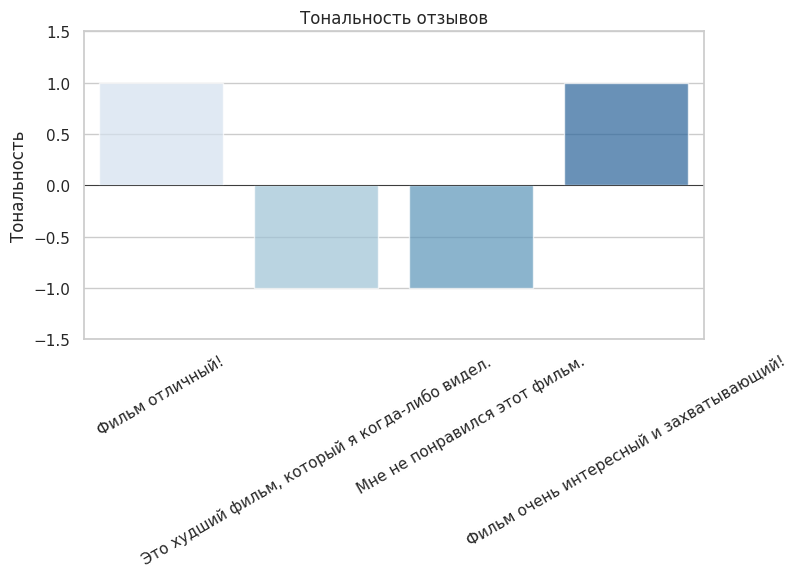

Предсказание для нового документа: Спорт


<ipython-input-1-8c258772f192>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=documents, y=y_docs, palette='Set1', alpha=0.7)


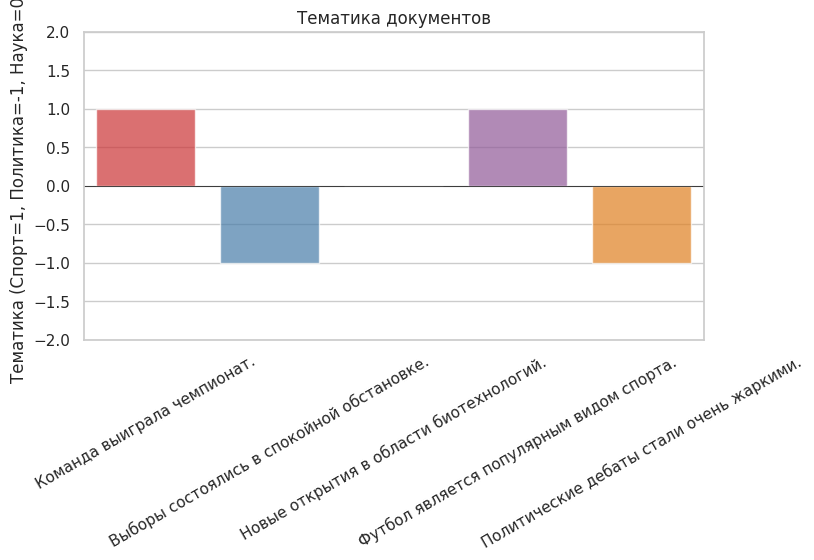

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Пример 1: Классификация тональности текста
reviews = [
    "Фильм отличный!",
    "Это худший фильм, который я когда-либо видел.",
    "Мне не понравился этот фильм.",
    "Фильм очень интересный и захватывающий!"
]
labels = [1, -1, -1, 1]  # 1 - позитивный, -1 - негативный

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews).toarray()

# Обучение модели SVM
model = svm.SVC(kernel='linear')
model.fit(X, labels)

# Новый отзыв
new_review = ["Фильм ужасный."]
X_new = vectorizer.transform(new_review).toarray()
prediction = model.predict(X_new)

print(f'Предсказание для нового отзыва: {"Позитивный" if prediction[0] == 1 else "Негативный"}')

# Визуализация
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.barplot(x=reviews, y=labels, palette='Blues', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Тональность отзывов')
plt.ylabel('Тональность')
plt.xticks(rotation=30)
plt.ylim(-1.5, 1.5)
plt.show()

# Пример 2: Классификация тематики документов
documents = [
    "Команда выиграла чемпионат.",
    "Выборы состоялись в спокойной обстановке.",
    "Новые открытия в области биотехнологий.",
    "Футбол является популярным видом спорта.",
    "Политические дебаты стали очень жаркими."
]
themes = ['Спорт', 'Политика', 'Наука', 'Спорт', 'Политика']  # Метки классов

# TF-IDF
vectorizer = TfidfVectorizer()
X_docs = vectorizer.fit_transform(documents).toarray()

# Кодирование меток классов
theme_mapping = {'Спорт': 1, 'Политика': -1, 'Наука': 0}
y_docs = np.array([theme_mapping[theme] for theme in themes])

# Обучение модели SVM
model_docs = svm.SVC(kernel='linear')
model_docs.fit(X_docs, y_docs)

# Новый документ
new_document = ["Олимпийские игры были великими."]
X_new_docs = vectorizer.transform(new_document).toarray()
prediction_docs = model_docs.predict(X_new_docs)

# Обратное преобразование меток
reverse_mapping = {1: 'Спорт', -1: 'Политика', 0: 'Наука'}
predicted_theme = reverse_mapping[prediction_docs[0]]

print(f'Предсказание для нового документа: {predicted_theme}')

# Визуализация
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.barplot(x=documents, y=y_docs, palette='Set1', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Тематика документов')
plt.ylabel('Тематика (Спорт=1, Политика=-1, Наука=0)')
plt.xticks(rotation=30)
plt.ylim(-2, 2)
plt.show()



### Вопросы для самопроверки

1. Что такое метод опорных векторов (SVM) и как он работает?
   
2. Объясните разницу между линейным и нелинейным SVM. В каких случаях следует использовать каждый из них?

3. Что такое ядро в SVM и как оно влияет на классификацию?

4. Опишите, как происходит процесс обучения SVM на наборе данных.

5. Что такое мягкий маржин и как он используется в SVM?

6. Как производится выбор параметра регуляризации $ C$ в SVM?

7. Что такое вектор весов $ w$ и как он влияет на решение задачи классификации?

8. Объясните, что такое TF-IDF и как он используется для представления текстовых данных.

9. Как можно визуализировать результаты работы SVM для двухмерных данных?

10. Что такое перекрестная проверка и как она применяется при оценке моделей SVM?

11. Какие преимущества и недостатки имеют методы опорных векторов по сравнению с другими алгоритмами классификации?

12. Как SVM может быть применен для многоклассовой классификации?

13. Как выбрать ядро для SVM в зависимости от типа данных?

14. Объясните, что такое Support Vectors и какую роль они играют в модели SVM.

15. Что такое градиентный спуск и как он связан с оптимизацией в SVM?

### Задачи для самостоятельной работы

#### Задачи на теорию и понимание

1. Опишите, как изменится производительность SVM при использовании различных ядер (линейное, полиномиальное, радиально-базисное).

2. Рассчитайте вектор весов для простой задачи классификации, используя следующие точки данных: (2, 3) - класс 1, (4, 5) - класс 1, (1, 1) - класс -1, (5, 4) - класс -1.

3. Напишите формулы для вычисления TF, IDF и TF-IDF и объясните их значение в контексте текстовой классификации.

4. Объясните, как можно улучшить качество классификации SVM с помощью отбора признаков.

5. Проанализируйте, как размер обучающего набора данных влияет на производительность SVM.

6. Сравните методы SVM и логистической регрессии в контексте бинарной классификации.

7. Создайте таблицу с преимуществами и недостатками различных ядер для SVM.

8. Объясните, как можно использовать SVM для задач регрессии.

9. Как бы вы применили SVM для классификации отзывов о фильмах (позитивные/негативные)?

10. Объясните, что такое метод "один против всех" в контексте многоклассовой классификации с использованием SVM.

11. Какова роль параметра $ \gamma$ в радиально-базисном ядре (RBF)?

12. Опишите, как осуществляется переобучение модели SVM и какие меры можно предпринять для его предотвращения.

13. Как SVM справляется с выбросами в данных и как это влияет на процесс обучения?

14. Объясните, что такое "классификация с мягким маргином" и как она отличается от "жесткого маргина".

15. Что такое "заблуждение по смещениям" (bias-variance tradeoff) и как оно относится к SVM?

#### Практические задачи

1. Соберите небольшой набор текстовых данных (например, отзывы о продуктах) и постройте классификатор SVM для предсказания положительных и отрицательных отзывов.

2. Примените SVM для классификации текстов, используя стандартный набор данных, такой как 20 Newsgroups или IMDB.

3. Создайте визуализацию данных, используя график рассеяния, чтобы показать, как работает SVM с различными ядрами.

4. Реализуйте SVM для многоклассовой классификации, используя методы "один против всех".

5. Используйте перекрестную проверку, чтобы оценить производительность модели SVM на произвольно выбранном наборе данных.

6. Изучите и протестируйте различные методы нормализации данных (например, Min-Max, Z-score) и их влияние на производительность SVM.

7. Оптимизируйте параметры модели SVM, используя сеточный поиск (Grid Search) и исследуйте, как это влияет на результаты.

8. Попробуйте использовать SVM для задачи обнаружения спама в электронных письмах, используя доступные наборы данных.

9. Напишите программу для автоматического предобучения SVM на основе TF-IDF в контексте вашей выборки текста.

10. Создайте модель SVM для классификации текстов на основе их длины и частоты определённых слов.

11. Используйте SVM для анализа тональности текстов в реальном времени, например, на Twitter, с использованием их API.

12. Реализуйте метод отбора признаков для уменьшения размерности данных перед подачей их на SVM.

13. Постройте тепловую карту для матрицы путаницы, полученной от модели SVM на тестовом наборе данных.

14. Сравните производительность SVM с другими алгоритмами машинного обучения (например, решающие деревья, наивный байесовский классификатор) на одном и том же наборе данных.

15. Разработайте приложение для классификации новостных статей на основе их содержания с использованием SVM и визуализацией результатов.
